In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.odr import *

BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"
aspect_ratio = 16./9

In [5]:
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(f)

In [19]:
def redchisqg(ydata,ymod,deg=2,sd=None):
    """
    Returns the reduced chi-square error statistic for an arbitrary model,
    chisq/nu, where nu is the number of degrees of freedom. If individual
    standard deviations (array sd) are supplied, then the chi-square error
    statistic is computed as the sum of squared errors divided by the standard
    deviations. See http://en.wikipedia.org/wiki/Goodness_of_fit for reference.
    ydata,ymod,sd assumed to be Numpy arrays. deg integer.
    Usage:
    chisq=redchisqg(ydata,ymod,n,sd)
    where
    ydata : data
    ymod : model evaluated at the same x points as ydata
    n : number of free parameters in the model
    sd : uncertainties in ydata
    Rodrigo Nemmen
    http://goo.gl/8S1Oo
    """
    # Chi-square statistic
    if(np.any(sd == None)):
        chisq=np.sum((ydata-ymod)**2)
    else:
        chisq=np.sum( ((ydata-ymod)/sd)**2 )

    # Number of degrees of freedom assuming 2 free parameters
    nu=ydata.size - 1. - deg

    return chisq/nu

def BIC(ydata,ymod,deg=2,sd=None):
    """
    Bayesian information criterion - https://en.wikipedia.org/wiki/Bayesian_information_criterion
    """
    
    chisq = redchisqg(ydata,ymod,deg=deg,sd=sd)
    
    return deg*np.log(len(ydata)) + chisq

Beta: [-0.12218076 23.28429553]
Beta Std Error: [0.03581152 2.86774947]
Beta Covariance: [[ 7.02263590e-04 -5.27231793e-02]
 [-5.27231793e-02  4.50336471e+00]]
Residual Variance: 1.826187207681554
Inverse Condition #: 0.004312763631839254
Reason(s) for Halting:
  Sum of squares convergence


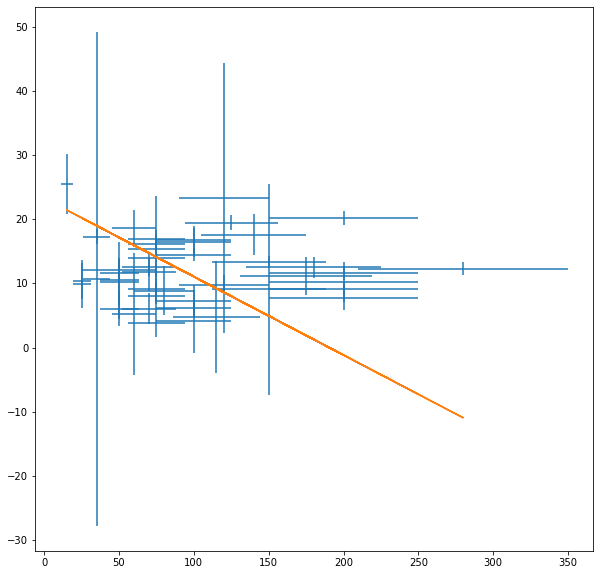

In [7]:
filename = "Reiss2014_Table1.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

ind = ~np.isnan(data['Horizontal_speed'])
mydata = RealData(data['Diameter'][ind], data['Horizontal_speed'][ind], 
              sx=data['Diameter_unc'][ind], sy=data['Horizontal_speed_unc'][ind]**2)
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.errorbar(data['Diameter'], data['Horizontal_speed'], ls='',
             xerr=data['Diameter_unc'], yerr=data['Horizontal_speed_unc'])

ax.plot(data['Diameter'], np.polyval(myoutput.beta, data['Diameter']))

Beta: [6.22529339e-03 1.15746167e+01]
Beta Std Error: [0.00497299 1.22822098]
Beta Covariance: [[ 1.17164000e-05 -2.46897133e-03]
 [-2.46897133e-03  7.14680974e-01]]
Residual Variance: 2.1107694782144706
Inverse Condition #: 0.0021088533168019
Reason(s) for Halting:
  Sum of squares convergence
153


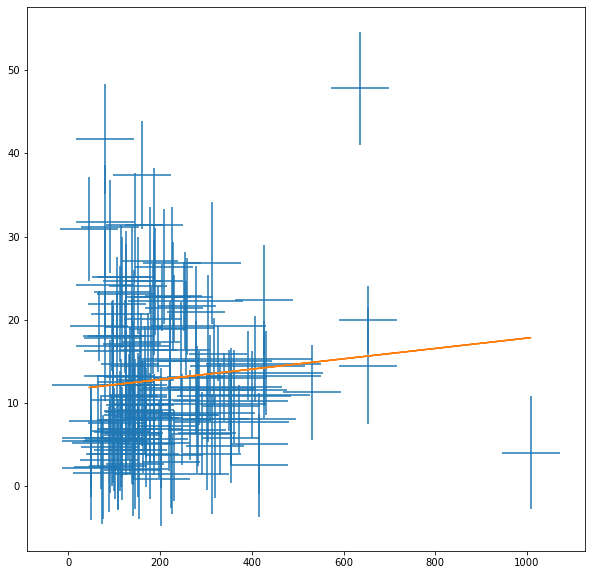

In [8]:
filename = "Stanzel2008_Table1_conditioned.txt"

data = np.genfromtxt(filename, delimiter=',', names=True)

ind = ~np.isnan(data['S1ND'])
mydata = RealData(data['Diameter'][ind], data['S1ND'][ind], 
              sx=data['Diameter_unc'][ind], sy=data['S1ND_unc'][ind])
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.errorbar(data['Diameter'], data['S1ND'], ls='',
             xerr=data['Diameter_unc'], yerr=data['S1ND_unc'])

ax.plot(data['Diameter'], np.polyval(myoutput.beta, data['Diameter']))

print(len(data['S1ND'][ind]))

Beta: [ 0.06163272 -0.25743135]
Beta Std Error: [0.00811103 1.79795243]
Beta Covariance: [[ 2.45474428e-05 -4.86385382e-03]
 [-4.86385382e-03  1.20617649e+00]]
Residual Variance: 2.6800662644306374
Inverse Condition #: 0.0020184867063623092
Reason(s) for Halting:
  Sum of squares convergence
179


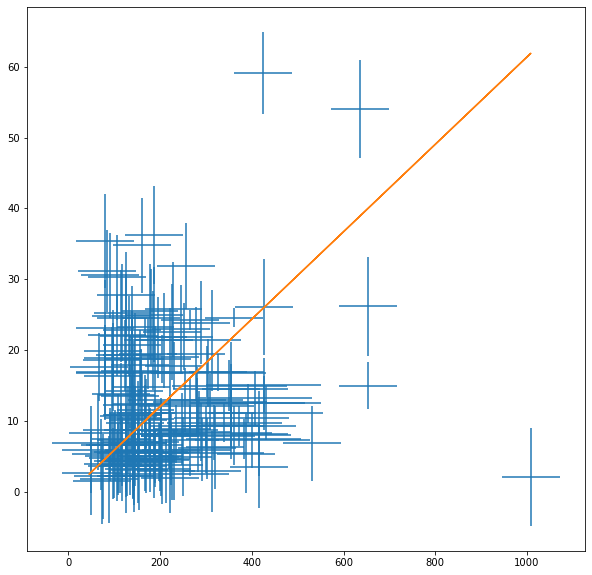

In [10]:
filename = "Stanzel2008_Table1_conditioned.txt"
data = np.genfromtxt(filename, delimiter=',', names=True)

ind = ~np.isnan(data['NDS2'])
mydata = RealData(data['Diameter'][ind], data['NDS2'][ind], 
              sx=data['Diameter_unc'][ind], sy=data['NDS2_unc'][ind])
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.errorbar(data['Diameter'], data['NDS2'], ls='',
             xerr=data['Diameter_unc'], yerr=data['NDS2_unc'])

ax.plot(data['Diameter'], np.polyval(myoutput.beta, data['Diameter']))

print(len(data['NDS2'][ind]))

m/sigma_m:  7.368055880049495
linear_BIC, med_BIC:,  16.31286675322083 10.55585641843468
5.498523210300594 5.14868464697456


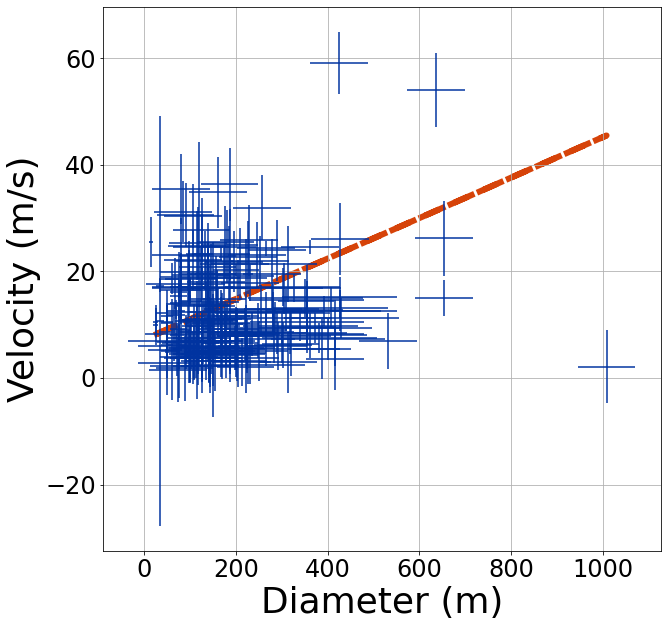

In [22]:
# Collate all numbers together
filename = "Stanzel2008_Table1_conditioned.txt"
data = np.genfromtxt(filename, delimiter=',', names=True)

ind = ~np.isnan(data['NDS2'])
diameters = data['Diameter'][ind]
diameters_unc = data['Diameter_unc'][ind]
velocities = data['NDS2'][ind]
velocities_unc = data['NDS2_unc'][ind]

filename = "Reiss2014_Table1.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)
ind = ~np.isnan(data['Horizontal_speed'])

diameters = np.append(diameters, data['Diameter'][ind])
velocities = np.append(velocities, data['Horizontal_speed'][ind])
diameters_unc = np.append(diameters_unc, data['Diameter_unc'][ind])
velocities_unc = np.append(velocities_unc, data['Horizontal_speed_unc'][ind])

mydata = RealData(diameters, velocities, 
              sx=diameters_unc, sy=velocities_unc)
myodr = ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
# myoutput.pprint()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.errorbar(diameters, velocities, ls='', color=BoiseState_blue,
             xerr=diameters_unc, yerr=velocities_unc)

ax.plot(diameters, np.polyval(myoutput.beta, diameters), color=BoiseState_orange, lw=6, ls='--', zorder=-1)

print("m/sigma_m: ", myoutput.beta[0]/myoutput.sd_beta[0])

# Compare to no correlation
# BIC(ydata,ymod,deg=2,sd=None)
linear_BIC = BIC(velocities, np.polyval(myoutput.beta, diameters), deg=2, sd=velocities_unc)
med_BIC = BIC(velocities, np.median(velocities), deg=1, sd=velocities_unc)
print("linear_BIC, med_BIC:, ", linear_BIC, med_BIC)
print(redchisqg(velocities, np.polyval(myoutput.beta, diameters), deg=2, sd=velocities_unc),
      redchisqg(velocities, np.median(velocities), deg=1, sd=velocities_unc))

ax.tick_params(labelsize=24)
ax.set_xlabel("Diameter (m)", fontsize=36)
ax.set_ylabel("Velocity (m/s)", fontsize=36)
ax.grid(True)